<a href="https://colab.research.google.com/github/Aayush6377/Machine-Learning-Lab-programs-Sem-6/blob/main/Lab_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classify handwritten digits (0-9) on MNIST dataset using neural networks**

In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [3]:
#Load and Preprocess the Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [6]:
#Build the Neural Network Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
#Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
#Train the Model
history = model.fit(x_train, y_train_cat, validation_split=0.1, epochs=10, batch_size=128)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8100 - loss: 0.6670 - val_accuracy: 0.9597 - val_loss: 0.1462
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9546 - loss: 0.1535 - val_accuracy: 0.9693 - val_loss: 0.1066
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9698 - loss: 0.1020 - val_accuracy: 0.9702 - val_loss: 0.0975
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9774 - loss: 0.0785 - val_accuracy: 0.9765 - val_loss: 0.0827
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9826 - loss: 0.0584 - val_accuracy: 0.9785 - val_loss: 0.0771
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9864 - loss: 0.0465 - val_accuracy: 0.9792 - val_loss: 0.0730
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9896 - loss: 0.0351 - val_accuracy: 0.9785 - val_loss: 0.0760
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9906 - loss: 0.0307 - val_accuracy: 0.

In [10]:
#Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {round(test_acc * 100, 2)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0958

Test Accuracy: 97.69%


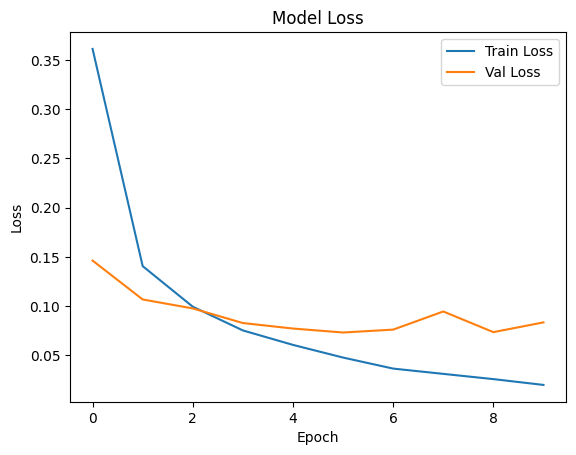

In [12]:
#Plot Loss Curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


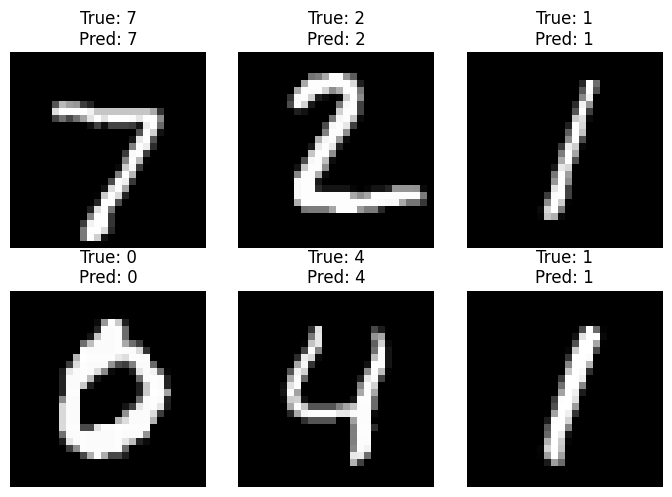

In [17]:
#Predict & Visualize
predictions = model.predict(x_test)
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title(f"True: {y_test[i]}\nPred: {np.argmax(predictions[i])}")
    ax.axis('off')

plt.tight_layout()
plt.show()